<a href="https://colab.research.google.com/github/Hwaulat/computer-vision/blob/main/image_processing/ip_morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://riset.informatika.umm.ac.id/aguseko/batik1.jpg --no-check-certificate

--2021-10-06 10:27:36--  https://riset.informatika.umm.ac.id/aguseko/batik1.jpg
Resolving riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)... 202.52.52.30
Connecting to riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)|202.52.52.30|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 34713 (34K) [image/jpeg]
Saving to: ‘batik1.jpg’

batik1.jpg          100%[===================>]  33.90K  --.-KB/s    in 0s      

2021-10-06 10:27:38 (210 MB/s) - ‘batik1.jpg’ saved [34713/34713]



In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2

Function to display images in Jupyter Notebooks and Google Colab

In [2]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [3]:
args = {
	"image": "jeruknipis.png"
}

In [ ]:
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)
# apply a series of erosions
for i in range(0, 3):
	eroded = cv2.erode(gray.copy(), None, iterations=i + 1)
	plt_imshow("Eroded {} times".format(i + 1), eroded)
	cv2.waitKey(0)

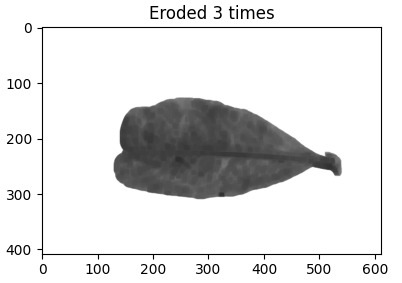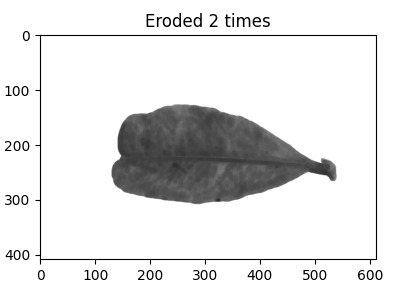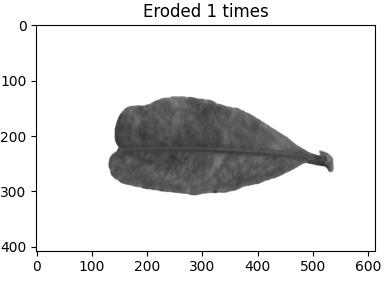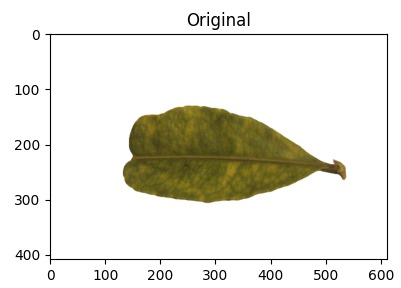

Dilation

In [ ]:
cv2.destroyAllWindows()
plt_imshow("Original", image)
# apply a series of dilations
for i in range(0, 3):
	dilated = cv2.dilate(gray.copy(), None, iterations=i + 1)
	plt_imshow("Dilated {} times".format(i + 1), dilated)
	cv2.waitKey(0)

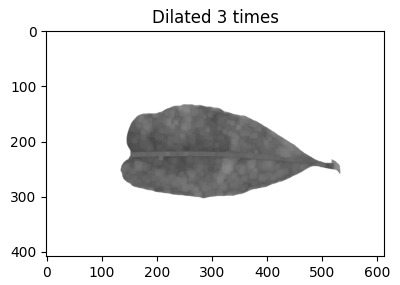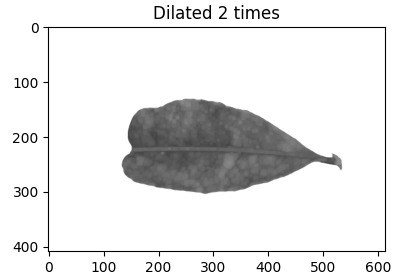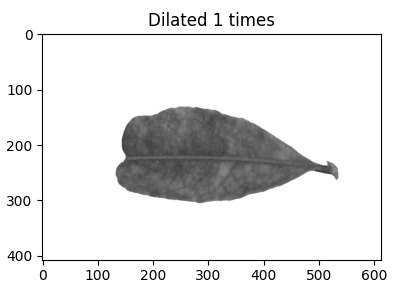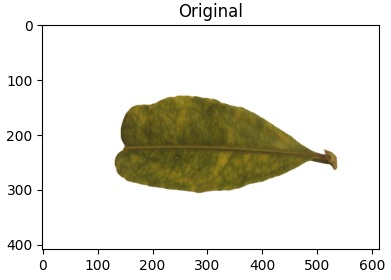

Opening

In [ ]:
cv2.destroyAllWindows()
kernelSizes = [(3, 3), (5, 5), (7, 7)]
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
	plt_imshow("Opening: ({}, {})".format(
		kernelSize[0], kernelSize[1]), opening)
	cv2.waitKey(0)

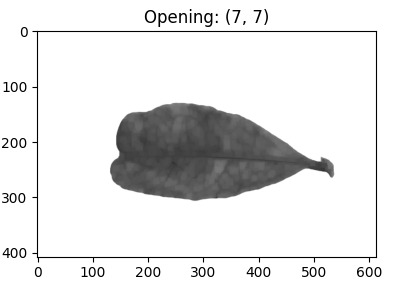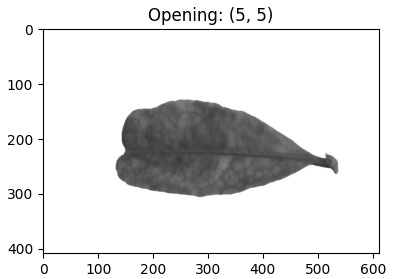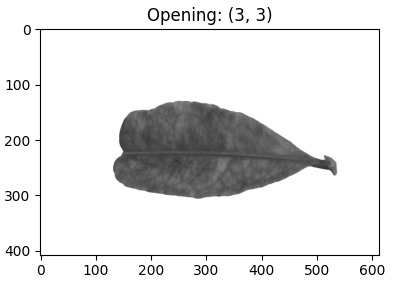

Closing

In [ ]:
cv2.destroyAllWindows()
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
	plt_imshow("Closing: ({}, {})".format(
		kernelSize[0], kernelSize[1]), closing)
	cv2.waitKey(0)

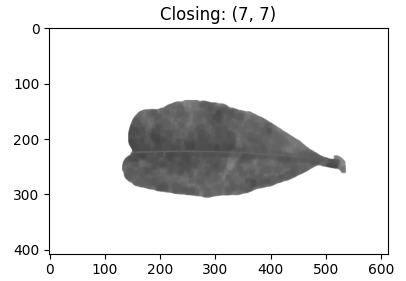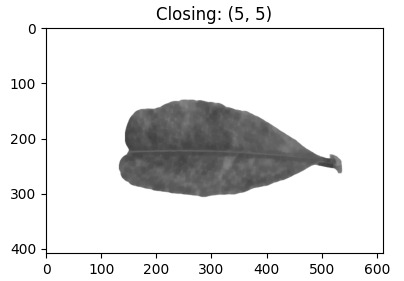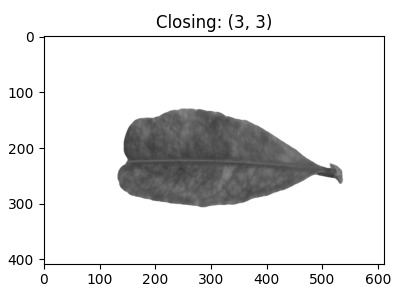

Morphological gradient


In [ ]:
cv2.destroyAllWindows()
for kernelSize in kernelSizes:

	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
	plt_imshow("Gradient: ({}, {})".format(
		kernelSize[0], kernelSize[1]), gradient)
	cv2.waitKey(0)

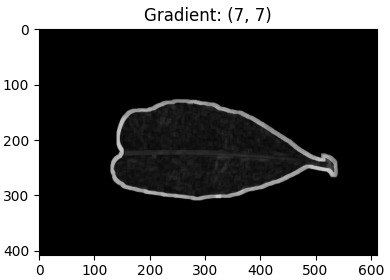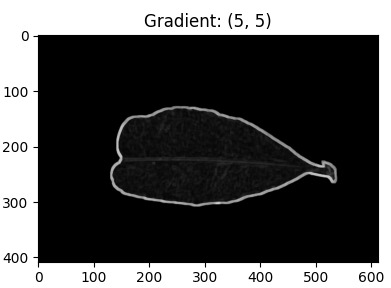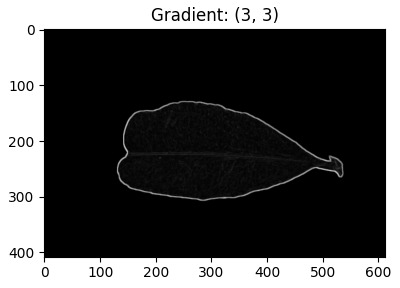

Morphological hats

Top hat/white hat and black hat

In [ ]:
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

In [ ]:
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
# show the output images
plt_imshow("Original", image)
plt_imshow("Blackhat", blackhat)
plt_imshow("Tophat", tophat)
cv2.waitKey(0)

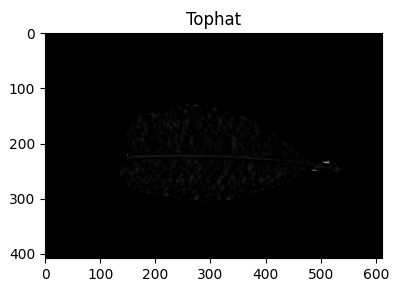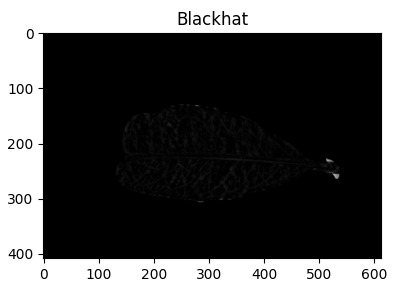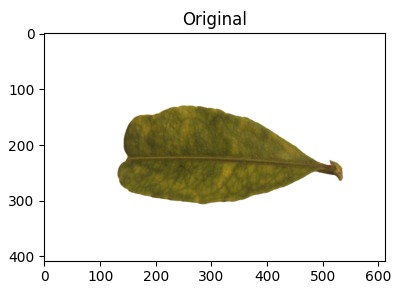